Data loaded successfully with 5735 entries.


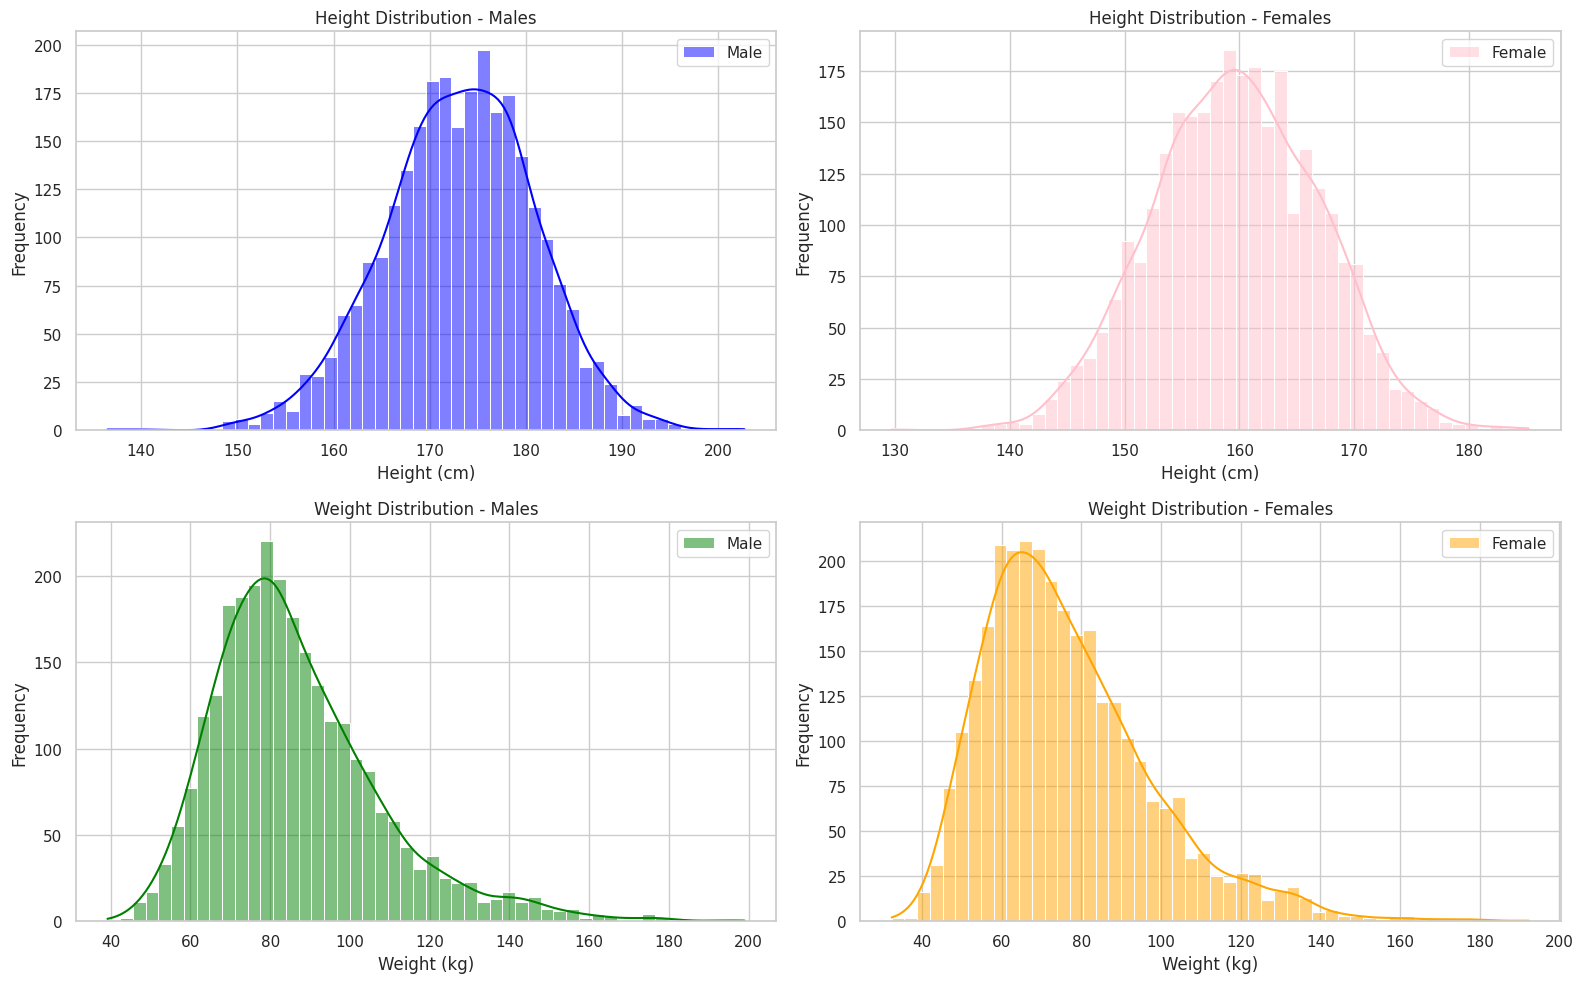

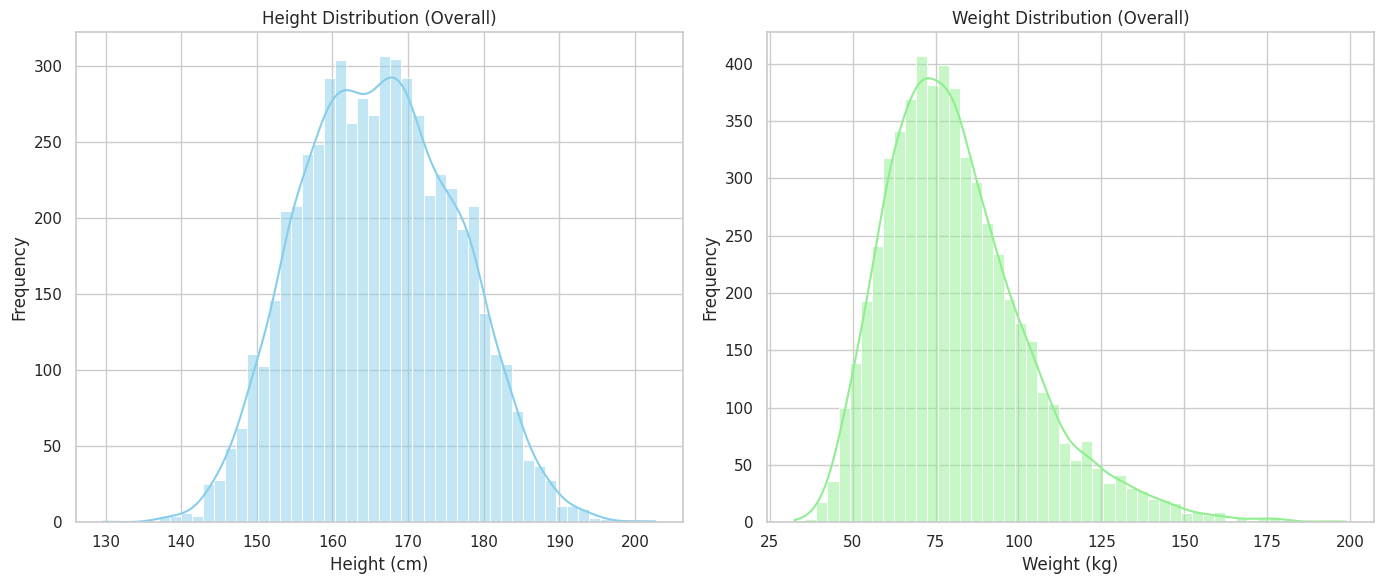


Descriptive Statistics for Overall Data:

--- BMXHT ---
Sample Size: 5662.0
Mean: 166.14
Standard Deviation: 10.08
Variance: 101.53
Minimum: 129.7
25th Percentile (Q1): 158.7
Median (Q2): 166.0
75th Percentile (Q3): 173.5
Maximum: 202.7

--- BMXWT ---
Sample Size: 5662.0
Mean: 81.34
Standard Deviation: 21.77
Variance: 473.75
Minimum: 32.4
25th Percentile (Q1): 65.9
Median (Q2): 78.2
75th Percentile (Q3): 92.7
Maximum: 198.9



Descriptive Statistics for Males:

--- BMXHT ---
Sample Size: 2718.0
Mean: 173.13
Standard Deviation: 7.83
Variance: 61.36
Minimum: 136.5
25th Percentile (Q1): 168.0
Median (Q2): 173.4
75th Percentile (Q3): 178.4
Maximum: 202.7

--- BMXWT ---
Sample Size: 2718.0
Mean: 86.56
Standard Deviation: 21.09
Variance: 444.88
Minimum: 39.2
25th Percentile (Q1): 72.0
Median (Q2): 82.8
75th Percentile (Q3): 97.2
Maximum: 198.9



Descriptive Statistics for Females:

--- BMXHT ---
Sample Size: 2944.0
Mean: 159.68
Standard Deviation: 7.19
Variance: 51.73
Minimum: 129.7
25th P

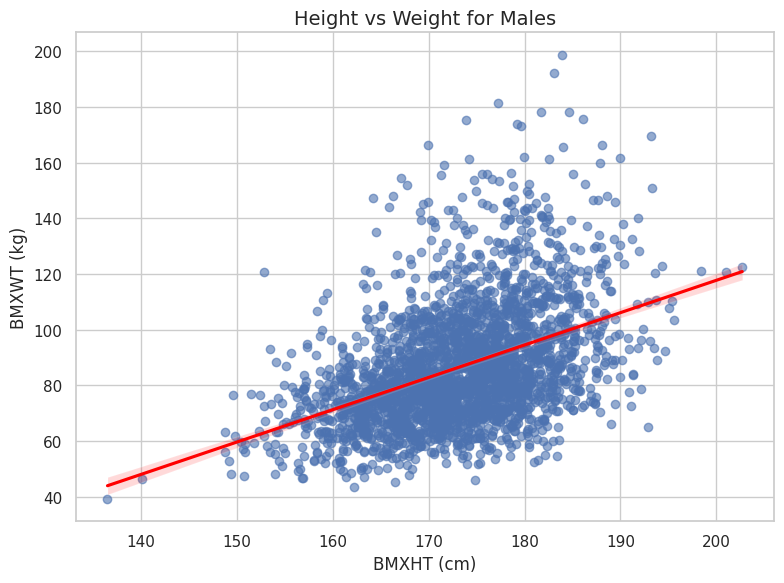

Correlation coefficient for Males: 0.4317




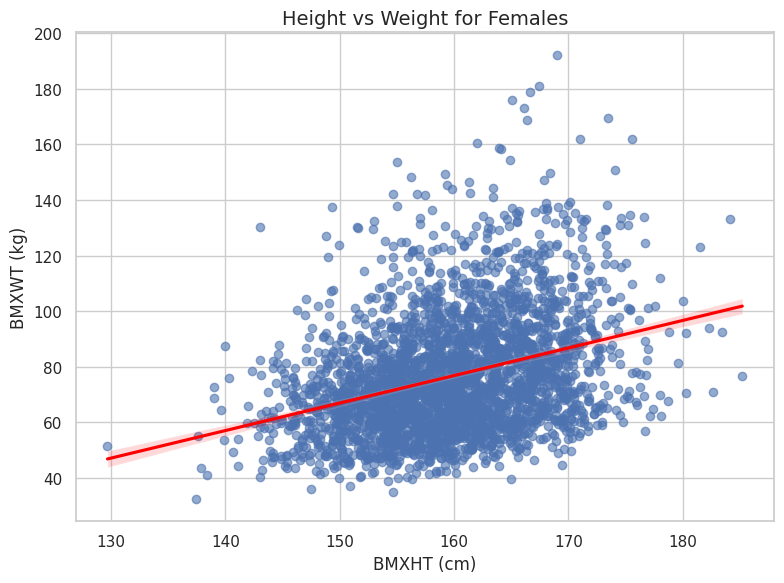

Correlation coefficient for Females: 0.3351




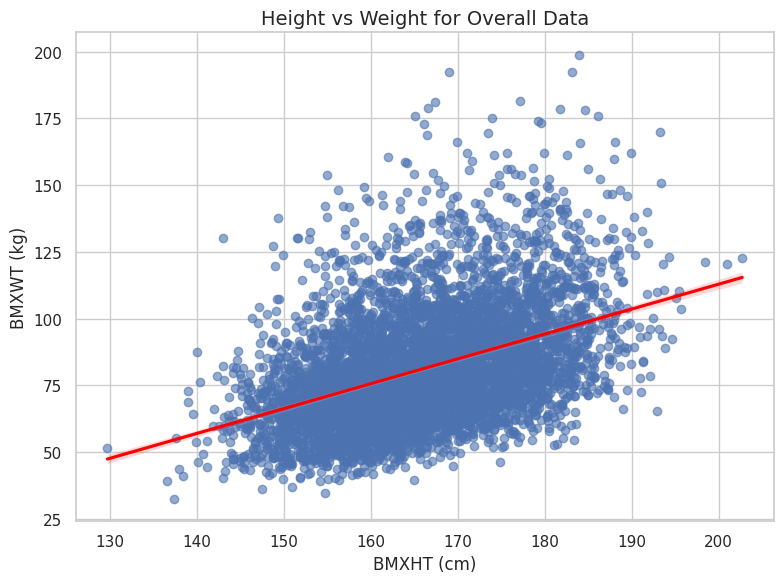

Correlation coefficient for Overall Data: 0.4314



General Insights:
1. Males are generally both taller (average height: 173.13 cm) and heavier (average weight: 86.56 kg) compared to females.
2. The average height of the population stands at 166.14 cm, with an average weight of 81.34 kg, reflecting common adult characteristics.
3. Males display a wider variation in both metrics.
4. The observed moderate positive correlation of 0.4314 between height and weight indicates that individuals with greater height tend to have higher weight.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn
sns.set(style="whitegrid")

# Loading the dataset from the manually uploaded file
def load_data(file_path):
    try:
        # Loading CSV file from file path, selecting only the columns for height (BMXHT), weight (BMXWT), and gender (RIAGENDR)
        data = pd.read_csv(file_path, usecols=['BMXHT', 'BMXWT', 'RIAGENDR'])
        print(f"Data loaded successfully with {data.shape[0]} entries.")
        return data
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: The file at '{file_path}' was not found.")
    except pd.errors.EmptyDataError:
        raise ValueError("Error: The file is empty.")
    except ValueError as e:
        raise ValueError(f"Error: {e}. Please check if the specified columns exist in the CSV file.")
    except Exception as e:
        raise RuntimeError(f"An error occurred: {e}")

# The path where the file was uploaded in Google Colab.Needed to upload source excel file to files in the left side. Select the content folder and upload the file there so that the file path in the code below works.
file_path = '/content/nhanes_2015_2016.csv'

# Loading dataset and handle errors
data = load_data(file_path)

# Cleaning the dataset by removing entries with missing values
# We assume that rows with missing height or weight are not useful in the analysis.
data_cleaned = data.dropna()
#print("Cleaned Data:")
#print(data_cleaned)

# Plotting histograms for height and weight for overall data
def plot_histograms(data):
    plt.figure(figsize=(14, 6))

    # Histogram for Height (Overall)
    plt.subplot(1, 2, 1)
    sns.histplot(data['BMXHT'], bins=50, kde=True, color='skyblue')
    plt.title('Height Distribution (Overall)')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')

    # Histogram for Weight (Overall)
    plt.subplot(1, 2, 2)
    sns.histplot(data['BMXWT'], bins=50, kde=True, color='lightgreen')
    plt.title('Weight Distribution (Overall)')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plotting histograms for height and weight, separated by gender
# The layout has been chosen as a 2x2 grid for easy comparison between male and female
def plot_gender_histograms(male_data, female_data):
    plt.figure(figsize=(16, 10))

    # Male Height
    plt.subplot(2, 2, 1)
    sns.histplot(male_data['BMXHT'], bins=50, kde=True, color='blue', label='Male')
    plt.title('Height Distribution - Males')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')
    plt.legend()

    # Female Height
    plt.subplot(2, 2, 2)
    sns.histplot(female_data['BMXHT'], bins=50, kde=True, color='pink', label='Female')
    plt.title('Height Distribution - Females')
    plt.xlabel('Height (cm)')
    plt.ylabel('Frequency')
    plt.legend()

    # Male Weight
    plt.subplot(2, 2, 3)
    sns.histplot(male_data['BMXWT'], bins=50, kde=True, color='green', label='Male')
    plt.title('Weight Distribution - Males')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.legend()

    # Female Weight
    plt.subplot(2, 2, 4)
    sns.histplot(female_data['BMXWT'], bins=50, kde=True, color='orange', label='Female')
    plt.title('Weight Distribution - Females')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.legend()

    plt.tight_layout()
    plt.show()

#In the dataset, 'RIAGENDR' is coded as 1 for Males and 2 for Females
male_data = data_cleaned[data_cleaned['RIAGENDR'] == 1]  # Male data
female_data = data_cleaned[data_cleaned['RIAGENDR'] == 2]  # Female data

# Calling the function to plot the histograms for gender-separated data
plot_gender_histograms(male_data, female_data)

# Calling the function to plot histograms for overall data
plot_histograms(data_cleaned)

# Function to calculate and print descriptive statistics for a given column
def descriptive_statistics(data, columns, label):
    print(f"\nDescriptive Statistics for {label}:")

    for col in columns:
        stats = data[col].describe()
        variance = data[col].var()

        # Printing statistics
        print(f"\n--- {col} ---")
        print(f"Sample Size: {stats['count']}")
        print(f"Mean: {stats['mean']:.2f}")
        print(f"Standard Deviation: {stats['std']:.2f}")
        print(f"Variance: {variance:.2f}")
        print(f"Minimum: {stats['min']}")
        print(f"25th Percentile (Q1): {stats['25%']}")
        print(f"Median (Q2): {stats['50%']}")
        print(f"75th Percentile (Q3): {stats['75%']}")
        print(f"Maximum: {stats['max']}")

    print("\n")  # Blank line for separation between different groups


# Calling the function for overall data
columns_to_analyze = ['BMXHT', 'BMXWT']  # List of columns for height and weight

# Overall observations:
# In the overall population, both height and weight display moderate variability.
# Average height is 166.14 cm, and average weight is 81.34 kg.
# In the overall sample, the relationship between height and weight is moderate, with a correlation coefficient of 0.4314.
descriptive_statistics(data_cleaned, columns_to_analyze, 'Overall Data')

# For males:
# On average, males are about 173.13 cm tall, which is greater than the average height of females.
# Males have a wider height range, with the first quartile at 168.0 cm and the third quartile at 178.4 cm, compared to females.
# Males have a higher average weight of 86.56 kg, and the variability in weight is similar for both males and females.
descriptive_statistics(male_data, columns_to_analyze, 'Males')

# For females:
# Females tend to be shorter (mean = 159.68 cm) and lighter (mean = 76.52 kg).
# Females show a tighter distribution in both height and weight, with the interquartile range (IQR) for height ranging from 154.7 cm to 164.8 cm.
# Females exhibit a clearer weight skewness, as heavier weights contribute to an extended upper distribution, reaching a maximum of 192.3 kg.
descriptive_statistics(female_data, columns_to_analyze, 'Females')


# Function to create scatter plots and calculate correlation
# This function visualizes height and weight data and calculates the correlation coefficient to indicate the strength of their linear relationship, displaying this coefficient alongside the plots for each gender and the overall population.
def scatter_and_correlation(data, x_col, y_col, gender_label):
    plt.figure(figsize=(8, 6))

    # Scatter plot with regression line
    sns.regplot(x=data[x_col], y=data[y_col], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

    plt.title(f'Height vs Weight for {gender_label}', fontsize=14)
    plt.xlabel(f'{x_col} (cm)', fontsize=12)
    plt.ylabel(f'{y_col} (kg)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculating and printing the correlation coefficient
    correlation = data[x_col].corr(data[y_col])

    # Comment on the correlation coefficient for each group:
    if gender_label == "Males":
        print(f"Correlation coefficient for {gender_label}: {correlation:.4f}")
        # There is a moderate positive correlation of 0.4317 among males, indicating that height is an important factor in estimating weight.
    elif gender_label == "Females":
        print(f"Correlation coefficient for {gender_label}: {correlation:.4f}")
        # Females display a slightly lower correlation of 0.3351 between height and weight, indicating that other factors might have a greater impact.
    else:
        print(f"Correlation coefficient for {gender_label}: {correlation:.4f}")
        # Overall, there is a moderate correlation of 0.4314, with a stronger influence from males on this relationship compared to females.
    print("\n")


# Scatter plots and correlation for males, females, and overall data
# Scatter plot for males:
# Illustrates the moderate positive correlation between height and weight, with a correlation coefficient of 0.4317.
scatter_and_correlation(male_data, 'BMXHT', 'BMXWT', 'Males')

# Scatter plot for females:
# Demonstrates a weaker correlation of 0.3351, indicating that height is a less significant predictor of weight for females.
scatter_and_correlation(female_data, 'BMXHT', 'BMXWT', 'Females')

# Scatter plot for overall data:
# Emphasizes the general population, showing a moderate correlation of 0.4314 when considering both genders.
scatter_and_correlation(data_cleaned, 'BMXHT', 'BMXWT', 'Overall Data')

# General Insights Summary
print("\nGeneral Insights:")
print("1. Males are generally both taller (average height: 173.13 cm) and heavier (average weight: 86.56 kg) compared to females.")
print("2. The average height of the population stands at 166.14 cm, with an average weight of 81.34 kg, reflecting common adult characteristics.")
print("3. Males display a wider variation in both metrics.")
print("4. The observed moderate positive correlation of 0.4314 between height and weight indicates that individuals with greater height tend to have higher weight.")

